In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from random import random
import time
import math
from scipy.stats import norm

# Monte Carlo Wind Speed Simulation for calculating Annual Energy Production

## 1. What is a simulation?

A simulation is the re-creation of a real world process in a controlled environment. It uses something called modeling to figure out the result of the simulation. A model is a representation of an object or process that describes and explains that phenomenon when it can't be experienced directly. In science, we come up with lots of rules and laws to describe the world, and those models together allow us to create simulations. For example, we might study the way air molecules move when there is a heat source nearby and create a model to describe it. Then we can put dozens of molecules together and do a simulation.

For realistic simulations on a computer, you will usually have to input all kinds of complex physics equations. Computers can do calculations using those equations far faster than humans, and have allowed us to take simulations to a new level in recent years.

Simulations are used in many ways. They're used for scientific discovery, to test designs for safety, to save money, and even to create graphics for movies and video games.

Scientists use simulations all the time. For example, you could input the laws of gravitation into a computer, and use it to create a 3D simulation of the planets of the solar system orbiting the Sun. Then you could fire asteroids through the solar system and see what happens. These are the kinds of simulations that save us a lot of work; years ago, figuring out what would happen would have required weeks of calculations completed by hand. Simulations are also used in meteorology to study weather and climate change, but this is an area where modeling is difficult. Predicting the motions of every particle in the Earth's atmosphere is incredibly hard, and that is why weather forecasts can be so wrong sometimes.

Simulations are also used by private businesses, especially for safety tests. There's no point in building a car and then finding out that your design is so unsafe it will never be allowed on the road. Instead, one of the first steps is to use computer simulations to make sure your design is at least safe in theory. Car models can be run through all kinds of simulated crashes, and the design can be improved to fix any problems before an expensive prototype is built.
Last of all, simulations are used in movies and video games. These days CGI graphics are used everywhere.

## 2. Monte Carlo method
Monte Carlo (MC) methods are a subset of computational algorithms that use the process of repeated random sampling to make numerical estimations of unknown parameters. They allow for the modeling of complex situations where many random variables are involved, and assessing the impact of risk. The uses of MC are incredibly wide-ranging, and have led to a number of groundbreaking discoveries in the fields of physics, game theory, and finance. There are a broad spectrum of Monte Carlo methods, but they all share the commonality that they rely on random number generation to solve deterministic problems. I hope to outline some of the basic principles of MC, and perhaps infect you with a bit of the excitement that I have about their possible applications.
The concept was invented by Stanislaw Ulam, a mathematician who devised these methods as part of his contribution to the Manhattan Project. He used the tools of random sampling and inferential statistics to model likelihoods of outcomes, originally applied to a card game (Monte Carlo Solitaire). Ulam later worked with collaborator John von Neumann, using newly developed computer technologies to run simulations to better understand the risks associated with the nuclear project. As you can imagine, modern computational technology allows us to model much more complex systems, with a larger number of random parameters, like so many of the scenarios that we encounter during our everyday lives.

## 3. Calculation of numerical integration with Monte Carlo method
In general, the Monte Carlo methods are used in mathematics to solve various problems by generating suitable random numbers  and observing that fraction of the numbers that obeys some property or properties. The method is useful for obtaining numerical solutions to problems too complicated to solve analytically. The most common application of the Monte Carlo method is Monte Carlo integration.
Numerical integration is the approximate computation of an integral using numerical techniques. The numerical computation of an integral is sometimes called quadrature.

### 3.1. Calculate numerical integration with Monte Carlo method 
### 3.1.1 Calculate the area of a cirle with radius = 1.

 In the following decart coordinate system we draw a quarter of a circle where x and y are greater than zero. 
 The circle is nested in a square with side = 1.
 We generate random dots in the square, the green one are positioned inside the circle area, whereas the blue ones are outside.
 If we take the ratio between the count of the green dots divided by the total count of the dots it will be equal to the ratio of the circle quarter area divided by the square area. 

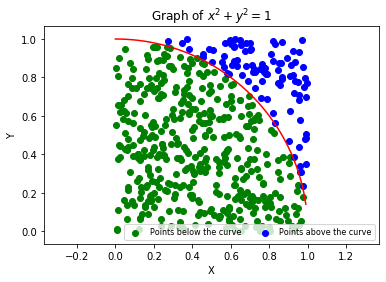

In [3]:
def calculate_y_from_circle_equation(x):
    return np.sqrt(1-x**2)

dots = 500
x = np.arange(0, 1, 0.01)
y = calculate_y_from_circle_equation(x)
x_rand = np.random.random(dots)
y_rand = np.random.random(dots)

ind_below = np.where(y_rand < calculate_y_from_circle_equation(x_rand))
ind_above = np.where(y_rand >= calculate_y_from_circle_equation(x_rand))

pts_below = plt.scatter(x_rand[ind_below], y_rand[ind_below], color = "green")
pts_above = plt.scatter(x_rand[ind_above], y_rand[ind_above], color = "blue")
plt.plot(x, y, color = "red")

plt.axis('equal')
plt.legend((pts_below, pts_above),
           ('Points below the curve', 'Points above the curve'),
           ncol=3,
           fontsize=8)
plt.title(r"Graph of $x^2 + y^2 = 1$")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Now we can see the visualization of the simulation. Lets step up and calculate the circle area.

In [4]:
def calculate_circle_area_with_monte_carlo(total_random_points_count = 100000):    
    points_in_circle_area_count = sum(1 for i in range(total_random_points_count) if random()**2 + random()**2 < 1)
    circle_area_quarter = points_in_circle_area_count / total_random_points_count
    circle_area = 4 * circle_area_quarter
    
    return circle_area

circle_area = calculate_circle_area_with_monte_carlo(1000000)
print("Monte Carlo method calculation of the circle area is " + str(circle_area))

Monte Carlo method calculation of the circle area is 3.138464


 ### 3.2. Compare Monte Carlo numerical integration with Trapezoid Rule method   
We know the equation of a circle is not a function . One way is to integrate both of the functions and add them together. Another way is to integrate one and double the area.
Another, even more clever way is to look at a quarter of the circle. This is convenient because we may look at the quadrant where $x > 0$ and $y > 0$. So, we'll need to find the area between:
1. $x \ge 0$
2. $y \ge 0$
3. The circle $x^2 + y^2 \le R^2$ (let's fix the radius to be 1)

$\Rightarrow y = \sqrt{R^2 - x^2} = \sqrt{1 - x^2}$

After all of this, we'll need to multiply the result by 4.

$$ S = 4 \int_0^1\sqrt{1 - x^2}dx $$


In [5]:
def calculate_integral(function, x_min, x_max, num_points = 5000):
    sum = 0
    h = (x_max - x_min) / num_points
    points = np.linspace(x_min, x_max, num_points)
    for point in points:
        sum += (function(point - h) + function(point))*h/2
        
    return sum

In [6]:
def calculate_circle_area_with_trapezoid_rule():
    circle_piece_area = calculate_integral(lambda x: np.sqrt(1 - x ** 2), 0, 1)
    total_area = 4 * circle_piece_area
    
    return total_area

In [7]:
circle_area = calculate_circle_area_with_trapezoid_rule()
print("Trapezoid Rule method calculation of the circle area is " + str(circle_area))

Trapezoid Rule method calculation of the circle area is 3.1417609297274764


### Now we can compare the execution time of the two methods

First a helper function is created in order to measure the average execution time of a given function

In [8]:
def measure_average_execution_time(f, executions_number):
    start_time = time.perf_counter()
    for _ in range(executions_number):
        f()
    
    end_time = time.perf_counter()
    
    return (end_time - start_time) / executions_number


In [9]:
monte_carlo_avg_execution_time = measure_average_execution_time(calculate_circle_area_with_monte_carlo, 100)
print("Monte Carlo method average execution time is " + str(monte_carlo_avg_execution_time))

Monte Carlo method average execution time is 0.054388662999999726


In [10]:

trapezoid_rule_avg_execution_time = measure_average_execution_time(calculate_circle_area_with_trapezoid_rule, 100)
print("Trapezoid Rule method average execution time is " + str(trapezoid_rule_avg_execution_time))

Trapezoid Rule method average execution time is 0.02235268799999858


### Now lets test the accuracy of the methods

In [11]:
def get_average_execution_result(f, executions_number):
    values = [f() for i in range(executions_number)]
    return sum(values)/len(values)

In [12]:
monte_carlo_circle_area =  get_average_execution_result(calculate_circle_area_with_monte_carlo, 100)
print("Monte Carlo method average result diviation is " + str(abs(math.pi - monte_carlo_circle_area)))

Monte Carlo method average result diviation is 0.00044625358979377694


In [13]:
trapezoid_rule_circle_area =  get_average_execution_result(calculate_circle_area_with_trapezoid_rule, 100)
print("Trapezoid Rule method average result diviation is " + str(abs(math.pi - trapezoid_rule_circle_area)))

Trapezoid Rule method average result diviation is 0.00016827613767933514


### In conclusion the Trapezoid Rule method is faster and more accurate then the Monte Carlo method

## 4.  Wind energy yield analysis with Monte Carlo Method
In wind power generation more than in power and energy generation by any other source, the amount of risk factor is high. Is the risk factor so high as to group it with gambling or chances of failure? Perhaps not exactly so, even if the chances of success are questionable in comparing with other conventional energy generation sources such as fossil or nuclear, or even comparing the wind power generation with other renewable energy sources such as solar, hydro, geothermal, and even bioenergy. If the questionable chances of success are due to uncertainties of wind then, it is pertinent that we address this particular item and rationalize it to establish a degree of certainty before we can compare with other energy sources and invest our resources with confidence. The factors of uncertainty of wind can be due to vagaries of wind or due to seasonal, diurnal, hourly, or even variations in direction and in its intensity at different heights of turbine towers and the wind impulse on the blade profiles. All of this is due to variations of wind. Given a wide range of wind data, perhaps it is possible to correctly estimate and design wind turbine accordingly.
   
Monte Carlo simulation is helpful in providing greater insight to a problem or a system too complex to lend itself to other mathematical techniques. The method involves a mathematical model to calculate results based on input variables or parameters. The variables are of two kinds: decision parameters which can be chosen, such as height of the tower and blade parameters which the analyst can pick, and stochastic or random variables which may take a range of values on which the analyst has no control, such as wind parameters in wind energy model. Random variables are selected from specially prepared probability tables which give the probability that the random variable will have a particular value even though these random variables are independent. That means that the probability distribution of each variable is independent of the values chosen for others. The purpose of this model is to calculate a suitable velocity in a particular scenario of height of the turbine tower, turbine blade profile, and a particular location to use in comparing the turbine capacity used in turbine pricing calculations for making cost comparisons. Thus, the Monte Carlo simulation provides a histogram, a graph, or a table showing values of the wind profile outputs, to be utilized for such a purpose. 
    
Monte Carlo methods can be used to analyze (complex) inputs by simulating the various sources of uncertainty affecting their value and then determining their average value over the range of resultant outcomes. The advantage of Monte Carlo methods over other techniques increases as the sources of uncertainty increase. The Monte Carlo method uses statistical sampling employed to approximate solutions to quantitative problems. Essentially, the Monte Carlo method solves a problem by directly simulating the underlying (physical) process and then calculating the (average) result of the process. Monte Carlo method is used to simulate the various sources of uncertainty and then calculate a representative value given these possible values of the underlying inputs, "Covering all conceivable real world contingencies in proportion to their likelihood. Monte Carlo methods are used to construct "stochastic" or probabilistic models as opposed to the traditional static and deterministic models. In particular based on the analysis of the wind characteristics, it is possible to postulate a value impacted by uncertainty modeled, incorporating any correlation between these, mathematically reflecting their "random characteristics." Then, these results are combined in a histogram i.e., the wind's probability distribution. This distribution allows for an estimate of the probability of the wind potential to be used in the economic analysis of the power and energy generation by wind. In wind energy yield analysis, the predicted energy output of a wind farm during its lifetime is calculated giving different levels of uncertainty. 


### 4.1 Problem: Calculate Annual energy production (AEP) with random wind speed samples for 45, 50 and 50m height of the turbine tower




A novel Monte Carlo (MC) approach is proposed for the simulation of wind speed samples
to assess the wind energy production potential of a site. The Monte Carlo approach is based on historical average wind speed data per season. Annual energy production (AEP) is simulated by transforming the simulated wind speed values via the power curve of the wind turbine at the site. The proposed Monte Carlo approach is generic and is applicable for all sites provided that a sufficient amount of wind speed data and information on the power curve are available.
We choose to use wind turbine Enercon E-44 900.0 kW.

#### Transform wind speed in power via turbine power curve
Wind turbine Enercon E-44 900.0 kW has the following power curve:
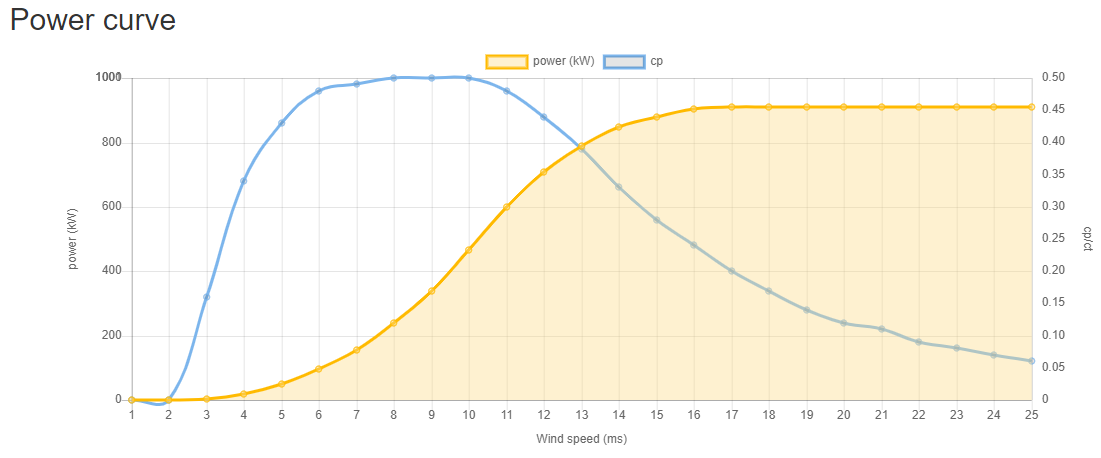
We don't have the equation of the curve so with the following function we will split the curve in smaller linear pieces.
Cut-out wind speed = 34 m/s

In [14]:
def transform_wind_speed_to_power(wind_speed):
    if wind_speed < 3.0:
        return 0
    if wind_speed < 7.0:
        return 38 * wind_speed - 110
    if wind_speed < 9.0:
        return 92 * wind_speed - 488
    if wind_speed < 10.0:
        return 103.333 * wind_speed - 567.333
    if wind_speed < 13.0:
        return 108 * wind_speed - 614
    if wind_speed < 16.0:
        return 38.333 * wind_speed + 291.666
    if wind_speed < 34.0:
        return 910
    
    return 0

* Test: Lets make a quick plot of the transform_wind_speed_to_power function and see if it is close enough with the original power curve

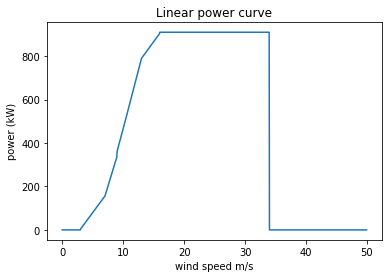

In [15]:
x = np.arange(0, 50, 0.05)
y = [transform_wind_speed_to_power(i) for i in x] 

plt.plot(x, y)
plt.xlabel("wind speed m/s")
plt.ylabel("power (kW)")
plt.title("Linear power curve")
plt.show()

It looks like the function is returning the correct values and the shape overall is correct.
The drop in the end is caused by Cut-out wind speed limit, when a speed of 34 m/s is reached the turbine shuts down to avoid damage.

* A helper function get_month_days is used to get the number of days in a given month.

In [16]:
def get_month_days(month):
    if 1:
        return 31
    if 2:
        return 28
    if 3: 
        return 31
    if 4:
        return 30
    if 5:
        return 31
    if 6:
        return 30
    if 7:
        return 31
    if 8:
        return 31
    if 9:
        return 30
    if 10:
        return 31
    if 11:
        return 30
    if 12:
        return 31
        

* The following method generate wind speed values for each hour for an one year period

In [17]:
def generate_wind_speeds_for_one_year(wind_speeds_data):
    generated_wind_speeds_montly = np.array([np.random.normal(row["Mean"], row["Std"], get_month_days(row["Month"]) * 24) for index, row in wind_speeds_data.iterrows()])
    generated_wind_speeds = generated_wind_speeds_montly.flatten()
    
    return generated_wind_speeds
        

* We read wind speed data for hights 45m, 50m and 55m.

In [18]:
wind_speeds_45_table = pd.read_table("data/wind_speed_each_month_45m.dat")
wind_speeds_50_table = pd.read_table("data/wind_speed_each_month_50m.dat")
wind_speeds_55_table = pd.read_table("data/wind_speed_each_month_55m.dat")

* The wind speed histogram on hight 45m can be compared with the real measured wind speed data pdf plot
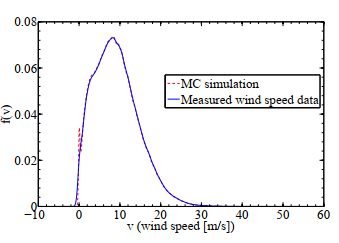

* Lets construct the probability density function (pdf) of wind speed. 

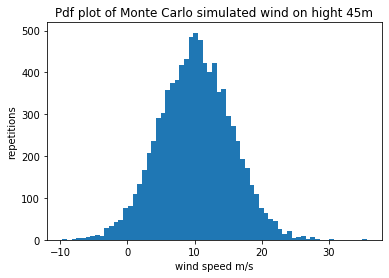

In [19]:
wind_speeds = generate_wind_speeds_for_one_year(wind_speeds_45_table)
plt.hist(wind_speeds, "fd")
plt.xlabel("wind speed m/s")
plt.ylabel("repetitions")
plt.title("Pdf plot of Monte Carlo simulated wind on hight 45m")
plt.show()

* The vectorized function of transform_wind_speed_to_power is created in order to be executed easier on a whole collection 

In [20]:
def vectorized_transform_wind_speed_to_power(wind_speeds_data):
    v_transform_wind_speed_to_power = np.vectorize(transform_wind_speed_to_power)
    return v_transform_wind_speed_to_power(wind_speeds_data)

* Following function calculates annual energy production in MWh

In [21]:
def calculate_annual_energy_production_in_mwh(wind_speeds_table):
    wind_speeds = generate_wind_speeds_for_one_year(wind_speeds_table)
    hourly_powers_for_one_year = vectorized_transform_wind_speed_to_power(wind_speeds)
    annual_energy_production = sum(hourly_powers_for_one_year)
    return annual_energy_production/1000

* It would be helpful to create function that executes calculate_annual_energy_production_in_mwh multiple times

In [22]:
def calculate_annual_energy_production_in_mwh_n_times(wind_speeds_table, executions_count):
    annual_energy_productions = np.array([calculate_annual_energy_production_in_mwh(wind_speeds_table) for i in range(executions_count)])
    return annual_energy_productions

## Having all functions that we need, we can proceed with the final calculation of the annual energy production for hub hights 45, 50 and 55.

In [23]:
annual_energy_productions_for_wind_speed_45 = calculate_annual_energy_production_in_mwh_n_times(wind_speeds_45_table, 1000)
annual_energy_productions_for_wind_speed_50 = calculate_annual_energy_production_in_mwh_n_times(wind_speeds_50_table, 1000)
annual_energy_productions_for_wind_speed_55 = calculate_annual_energy_production_in_mwh_n_times(wind_speeds_55_table, 1000)

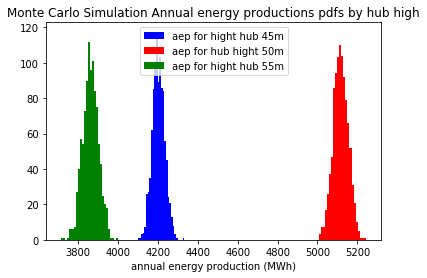

In [24]:
plt.hist(annual_energy_productions_for_wind_speed_45, bins="fd", color="blue")
plt.hist(annual_energy_productions_for_wind_speed_50, bins="fd", color="red")
plt.hist(annual_energy_productions_for_wind_speed_55, bins="fd", color="green")
plt.xlabel("annual energy production (MWh)")
plt.legend(["aep for hight hub 45m", "aep for hub hight 50m", "aep for hight hub 55m"])
plt.title("Monte Carlo Simulation Annual energy productions pdfs by hub high")
plt.show()

### Finally we need to calculate the annual energy production for level of uncertainity P50 and P90, which will be calculated with the percent point function (ppf)

* First we will calculate mean and standard deviation for each hub hight AEP

In [25]:
mean_45 = np.mean(annual_energy_productions_for_wind_speed_45)
std_45 = np.std(annual_energy_productions_for_wind_speed_45)

mean_50 = np.mean(annual_energy_productions_for_wind_speed_50)
std_50 = np.std(annual_energy_productions_for_wind_speed_50)

mean_55 = np.mean(annual_energy_productions_for_wind_speed_55)
std_55 = np.std(annual_energy_productions_for_wind_speed_55)


* Now we will calculate AEP with level of uncertainity P50

In [26]:
aep_45_p50 = norm.ppf(0.5, mean_45, std_45)
aep_50_p50 = norm.ppf(0.5, mean_50, std_50)
aep_55_p50 = norm.ppf(0.5, mean_55, std_55)
print("Annual energy production with confidence level P50 per hub hight:")
print("For hub hight 45m = " + str(aep_45_p50))
print("For hub hight 50m = " + str(aep_50_p50))
print("For hub hight 55m = " + str(aep_55_p50))     


Annual energy production with confidence level P50 per hub hight:
For hub hight 45m = 4203.179652423321
For hub hight 50m = 5116.8373406309465
For hub hight 55m = 3861.5893015237207


* Now we will calculate AEP with level of uncertainity P90

In [27]:
aep_45_p90 = norm.ppf(0.1, mean_45, std_45)
aep_50_p90 = norm.ppf(0.1, mean_50, std_50)
aep_55_p90 = norm.ppf(0.1, mean_55, std_55)
print("Annual energy production with confidence level P90 per hub hight:")
print("For hub hight 45m = " + str(aep_45_p90))
print("For hub hight 50m = " + str(aep_50_p90))
print("For hub hight 55m = " + str(aep_55_p90))

Annual energy production with confidence level P90 per hub hight:
For hub hight 45m = 4163.121912759328
For hub hight 50m = 5070.048835707884
For hub hight 55m = 3810.7834315444893


## Conclusion:
Even that the wind speed is much bigger on hight 55m, it's not the most optimal, because the turbine is turning off after the wind speed is above 34 m/s. It's even worse then the annual enery production (AEP) on 45m.

Ater the simulation we choose to install the turbine on hight 50m, because the AEP is the most optimal.

Also the information of the AEP for different confidence levels can be used in further calculations with a complex energy supply system.


### References:
* Simulations: Definition & Uses by David Wood https://study.com/academy/lesson/simulations-definition-uses.html
* An Overview of Monte Carlo Methods by Christopher Pease
 https://towardsdatascience.com/an-overview-of-monte-carlo-methods-675384eb1694
* Prof. Guttag discusses the Monte Carlo simulation, Roulette - MIT 6.0002 Introduction to Computational Thinking and Data Science, Fall 2016 https://www.youtube.com/watch?v=OgO1gpXSUzU
* Book: Wind Energy for Power Generation - Meeting the Challenge of Practical Implementation by K.R. Rao
* A Method for Estimating Annual Energy Production Using Monte Carlo Wind Speed Simulation https://www.researchgate.net/publication/301305797_A_Method_for_Estimating_Annual_Energy_Production_Using_Monte_Carlo_Wind_Speed_Simulation
* Wind turbine Enercon E-44 900.0 kW parameters https://en.wind-turbine-models.com/turbines/531-enercon-e-44

### Author: Georgi Ivaylov Georgiev